# Regresión Lineal y Polinomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

np.random.seed(0)

## Nuestros datos

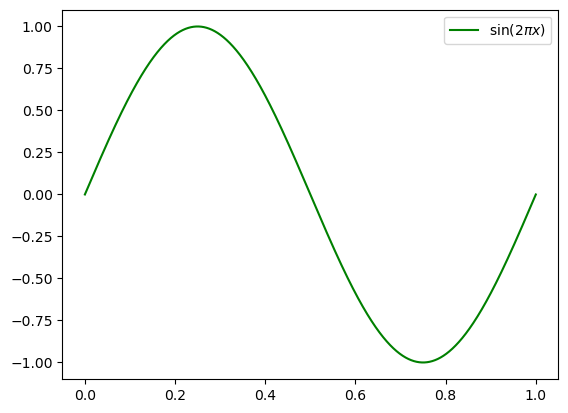

In [2]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

x, f_x = create_sinusoidal_data(0, 10**6)

plt.plot(x, f_x, color='green', label='$\sin(2\pi x)$')
plt.legend()
plt.show()

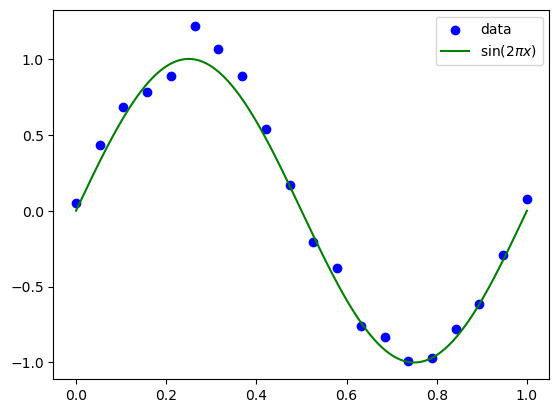

In [3]:
data_size = 20

X, y = create_sinusoidal_data(0.1, data_size)

plt.scatter(X, y, color='blue', label='data')
plt.plot(x, f_x, color='green', label='$\sin(2\pi x)$')
plt.legend()
plt.show()

## División de los datos en entrenamiento y validación

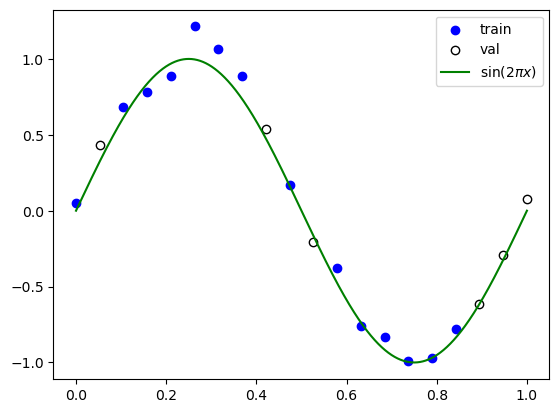

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=0)

plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_val, y_val, color='white', edgecolor='black', label='val')
plt.plot(x, f_x, color='green', label='$\sin(2\pi x)$')
plt.legend()
plt.show()

## Entrenamiento del modelo

In [5]:
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

### Regresión Lineal

f(x) = 1.163896686048483 + (-2.4801164319944995) * x
ECM - Entrenamiento: 0.2233799579555424
ECM - Validación: 0.5780364752816586


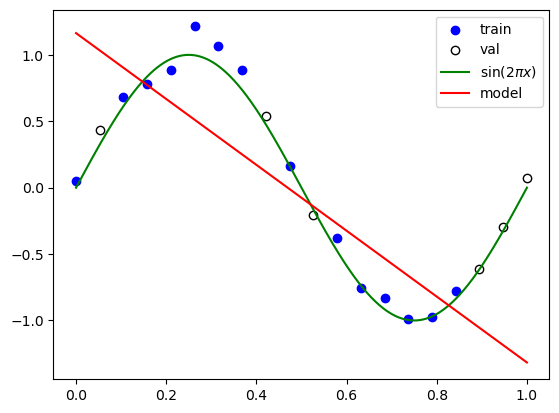

In [6]:
# Entrenamiento
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicción
y_train_pred = reg.predict(X_train)
y_val_pred = reg.predict(X_val)

## Fórmula del modelo
print(f'f(x) = {reg.intercept_} + ({reg.coef_[0]}) * x')

## Error cuadrático medio
print(f'ECM - Entrenamiento: {mean_squared_error(y_train, y_train_pred)}')
print(f'ECM - Validación: {mean_squared_error(y_val, y_val_pred)}')

# Gráfico
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_val, y_val, color='white', edgecolor='black', label='val')
plt.plot(x, f_x, color='green', label='$\sin(2\pi x)$')
plt.plot(x, reg.intercept_ + reg.coef_[0] * x, color='red', label='model')
plt.legend()

### Regresión Polinomial

Regresión polinómica de grado 0
    f(x) = 0.07301840581030068 * x^0
    ECM - Entrenamiento: 0.6532598807585828
    ECM - Validación: 0.17241753531340268


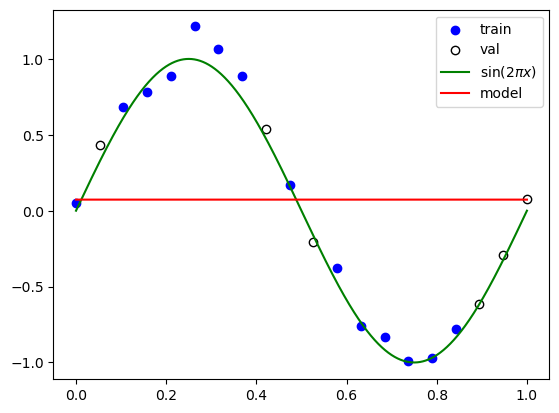

Regresión polinómica de grado 1
    f(x) = 1.1638966860484827 * x^0 + -2.4801164319945 * x^1
    ECM - Entrenamiento: 0.22337995795554239
    ECM - Validación: 0.5780364752816592


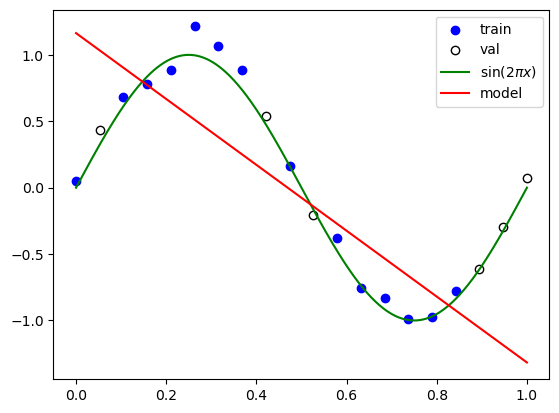

Regresión polinómica de grado 2
    f(x) = 0.5076727155189096 * x^0 + 2.26731144001979 * x^1 + -5.437247342172278 * x^2
    ECM - Entrenamiento: 0.12611730390420126
    ECM - Validación: 2.1442943886243016


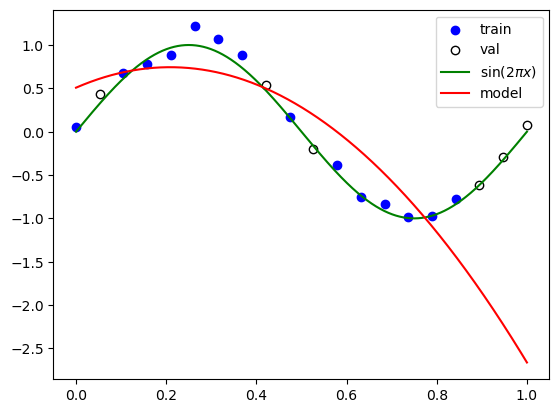

Regresión polinómica de grado 3
    f(x) = -0.09784004373316284 * x^0 + 11.897777492633338 * x^1 + -35.003439273392814 * x^2 + 23.498934305148527 * x^3
    ECM - Entrenamiento: 0.01669601656156977
    ECM - Validación: 0.011041661961726484


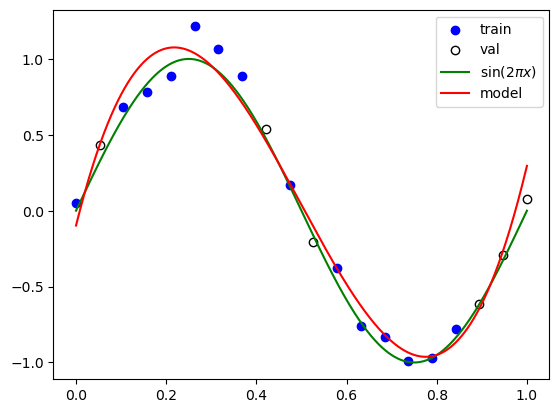

Regresión polinómica de grado 4
    f(x) = 0.026503861927391372 * x^0 + 7.060195703741983 * x^1 + -6.239479292166678 * x^2 + -30.93793570869071 * x^3 + 32.208831294021365 * x^4
    ECM - Entrenamiento: 0.007630635247418285
    ECM - Validación: 0.9172828156447744


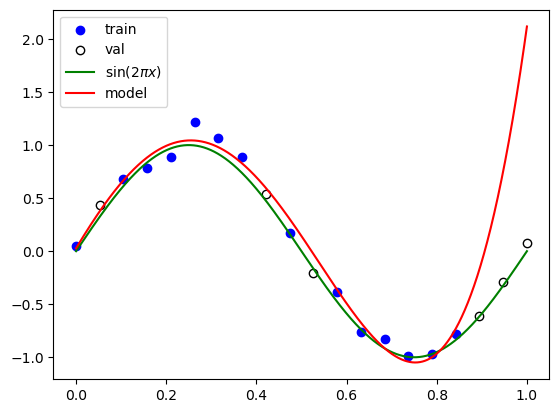

Regresión polinómica de grado 5
    f(x) = 0.064511209649402 * x^0 + 3.0584753479901576 * x^1 + 32.62857411926636 * x^2 + -160.82723807630376 * x^3 + 208.97056772900896 * x^4 + -84.11158601029136 * x^5
    ECM - Entrenamiento: 0.004979424437988026
    ECM - Validación: 0.020790794275054033


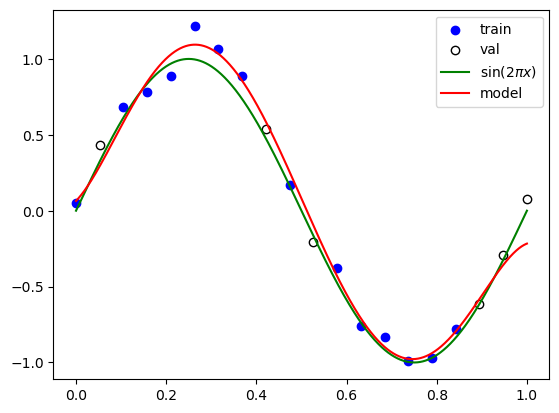

Regresión polinómica de grado 6
    f(x) = 0.06294558966902336 * x^0 + 3.6135110194286644 * x^1 + 24.937440642198705 * x^2 + -122.89561353666514 * x^3 + 124.23298020576266 * x^4 + 3.5130316731328235 * x^5 + -34.101849237272674 * x^6
    ECM - Entrenamiento: 0.004963596144167473
    ECM - Validación: 0.09939633233156657


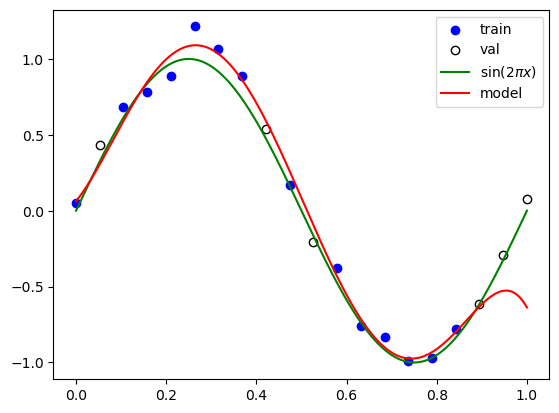

Regresión polinómica de grado 7
    f(x) = 0.05425138274854331 * x^0 + 15.181169793951664 * x^1 + -182.13153904775552 * x^2 + 1251.099930878166 * x^3 + -4293.959049637055 * x^4 + 7397.67104553959 * x^5 + -6228.204417441135 * x^6 + 2051.5131076142084 * x^7
    ECM - Entrenamiento: 0.0030020667662728146
    ECM - Validación: 23.3631673923721


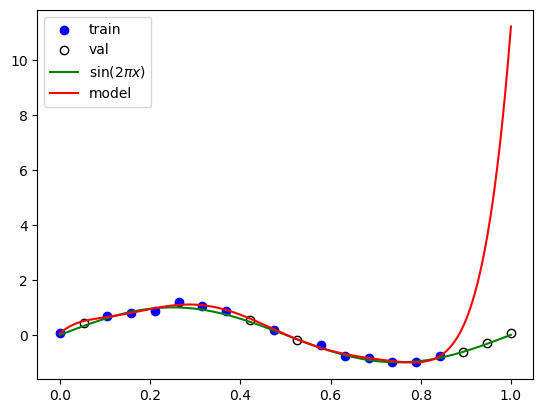

Regresión polinómica de grado 8
    f(x) = 0.051545287562602994 * x^0 + 31.042861821494828 * x^1 + -528.3571435252765 * x^2 + 4159.515628656108 * x^3 + -16695.000261268313 * x^4 + 36815.585324188665 * x^5 + -45531.927134395504 * x^6 + 29707.604327581143 * x^7 + -7969.216452371619 * x^8
    ECM - Entrenamiento: 0.0020547633406203425
    ECM - Validación: 20.587924051467706


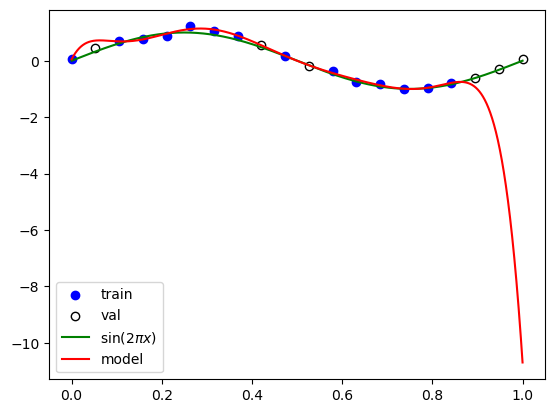

Regresión polinómica de grado 9
    f(x) = 0.051078024772904976 * x^0 + 44.47841231679104 * x^1 + -868.4496021198698 * x^2 + 7580.511545725175 * x^3 + -34798.77353147332 * x^4 + 92608.93515891091 * x^5 + -149123.90882582788 * x^6 + 143836.6901329329 * x^7 + -76664.5963939224 * x^8 + 17396.100153275904 * x^9
    ECM - Entrenamiento: 0.0019257261566912188
    ECM - Validación: 21.524195747019395


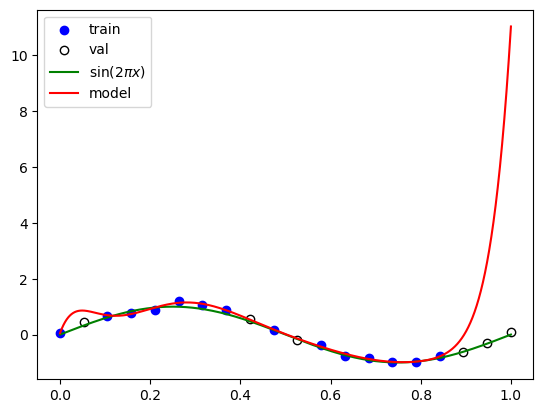

In [7]:
def polynomial_regression(X_data, y_data, degree):
    pf = PolynomialFeatures(degree=degree)
    reg = LinearRegression(fit_intercept=False)

    model = make_pipeline(pf, reg)

    return model.fit(X_data, y_data)

def graph_model(model, X_train, y_train, X_val, y_val, y_train_pred, y_val_pred, x, f_x):
    print(f'    f(x) = ', end='')
    for i, coef in enumerate(model.named_steps['linearregression'].coef_):
        print(f'{coef} * x^{i}', end='')
        if i + 1 < len(model.named_steps['linearregression'].coef_):
            print(' + ', end='')
    print()

    print(f'    ECM - Entrenamiento: {mean_squared_error(y_train, y_train_pred)}')
    print(f'    ECM - Validación: {mean_squared_error(y_val, y_val_pred)}')

    plt.scatter(X_train, y_train, color='blue', label='train')
    plt.scatter(X_val, y_val, color='white', edgecolor='black', label='val')
    plt.plot(x, f_x, color='green', label='$\sin(2\pi x)$')
    plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', label='model')
    plt.legend()
    plt.show()

train_errors, val_errors = [], []
for i in range(10):
    print(f'Regresión polinómica de grado {i}')
    model = polynomial_regression(X_train, y_train, i)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    graph_model(model, X_train, y_train, X_val, y_val, y_train_pred, y_val_pred, x, f_x)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

Vemos los errores para saber qué grado elegir

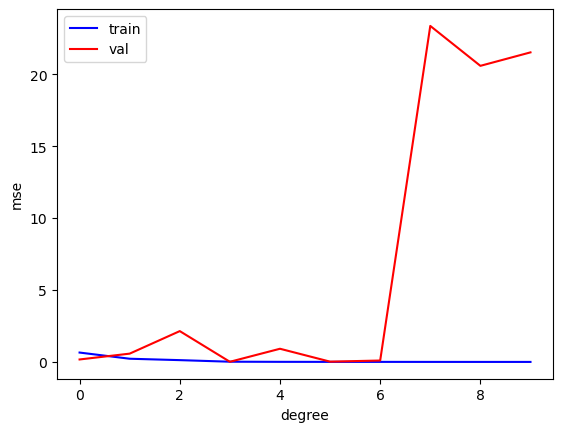

In [8]:
plt.plot(range(10), train_errors, color='blue', label='train')
plt.plot(range(10), val_errors, color='red', label='val')
plt.legend()
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

Como no se puede ver bien por el sobreajuste desde el grado $7$ en adelante, vamos a ver solo hasta el grado $6$

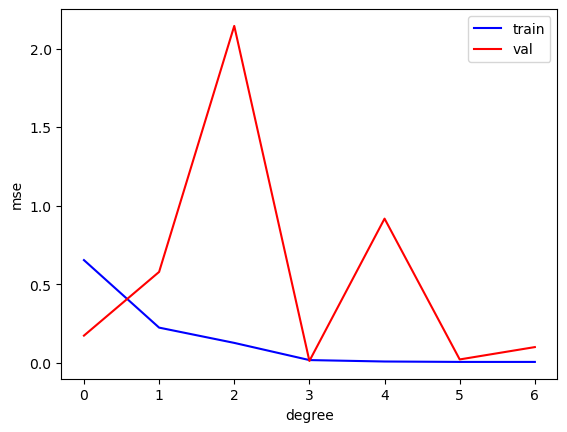

In [9]:
plt.plot(range(7), train_errors[:7], color='blue', label='train')
plt.plot(range(7), val_errors[:7], color='red', label='val')
plt.legend()
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

Luego, nos quedamos con el grado $3$